In [93]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [94]:
data = pd.read_csv('heart.csv')

In [95]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


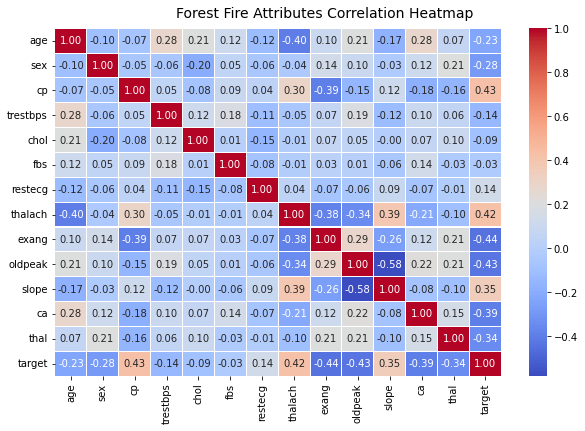

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 6))
data_corr = data.corr()
heatmap = sns.heatmap(round(data_corr,2),annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Forest Fire Attributes Correlation Heatmap', fontsize=14)

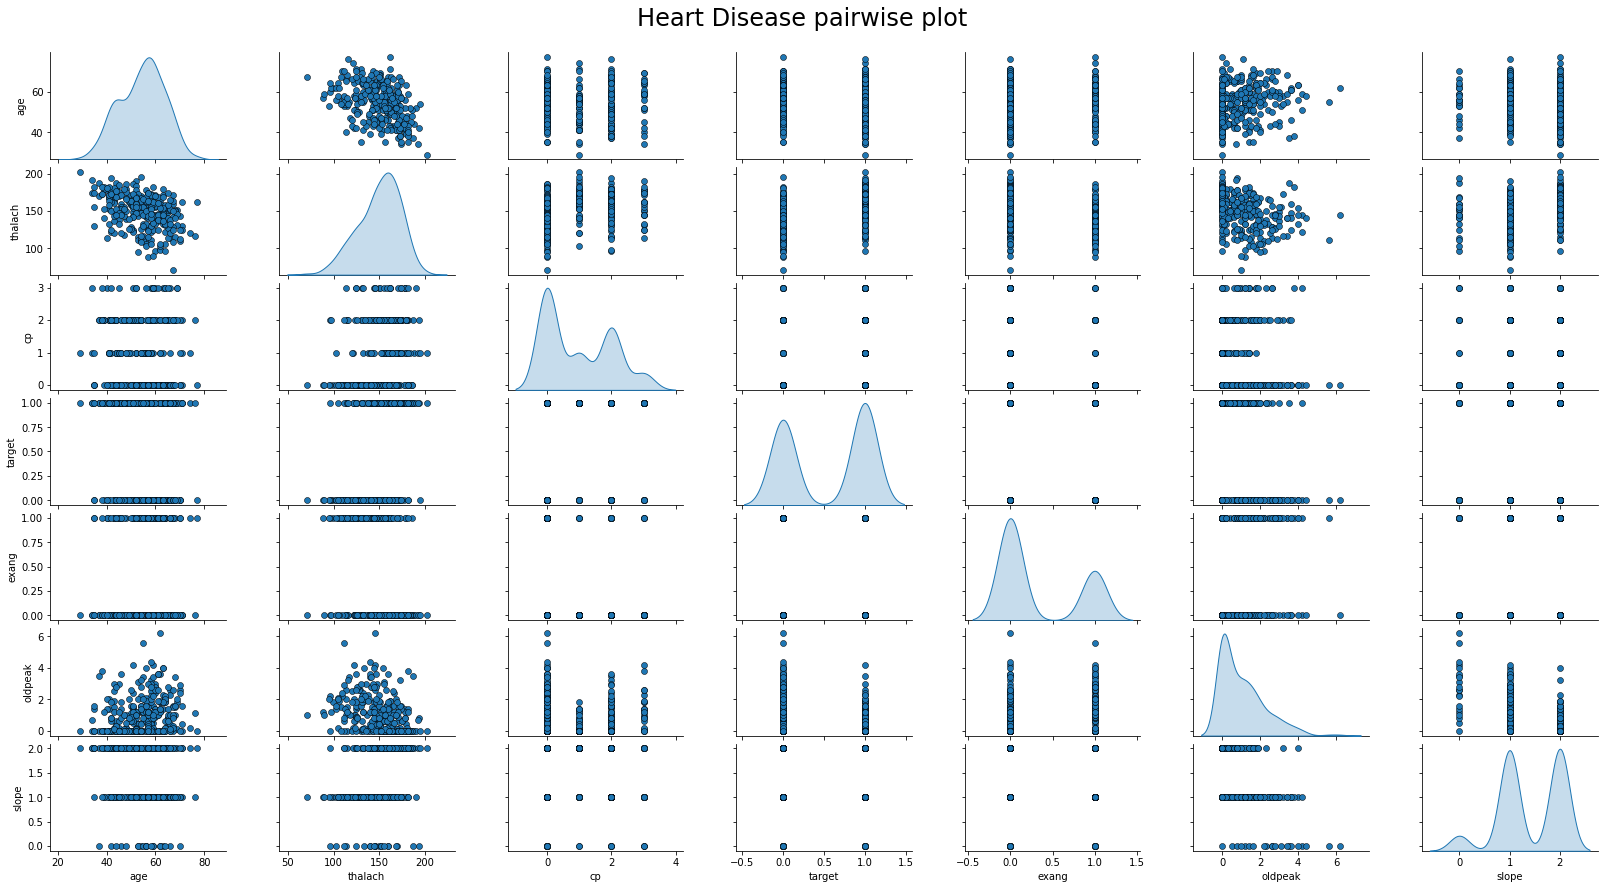

In [97]:
cols = ['age','thalach','cp','target','exang','oldpeak','slope']
pairplot = sns.pairplot(data[cols],height=1.8,aspect=1.8,plot_kws = dict(edgecolor='k',linewidth=0.5),diag_kind="kde",diag_kws=dict(shade=True))

fg=pairplot.fig
fg.subplots_adjust(top=0.93,wspace=0.3)
t= fg.suptitle('Heart Disease pairwise plot',fontsize=24)

In [98]:
#data for training
import numpy as np
labels = np.array(data['target'])

In [99]:
#data = data.drop(['Label'],axis=1)
data = data.drop(['target'],axis=1)
feature_list = list(data.columns)

features = np.array(data)

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size=0.2,random_state=0)

In [101]:
X_train.shape

(242, 13)

In [102]:
X_test.shape

(61, 13)

In [103]:
Y_train.shape

(242,)

In [104]:
Y_test.shape

(61,)

In [105]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [106]:
from sklearn.model_selection import KFold, cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix,make_scorer

def tn(Y_test,y_pred): return confusion_matrix(Y_test,y_pred)[0,0]
def fp(Y_test,y_pred): return confusion_matrix(Y_test,y_pred)[0,1]
def fn(Y_test,y_pred): return confusion_matrix(Y_test,y_pred)[1,0]
def tp(Y_test,y_pred): return confusion_matrix(Y_test,y_pred)[1,1]
def tpr(Y_test,y_pred): 
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round((no_tp / (no_tp + no_fn)),2)

def tnr(Y_test,y_pred): 
    no_tn = confusion_matrix(Y_test,y_pred)[0,0]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
   
    return round((no_tn / (no_tn + no_fp)),2)

def fpr(Y_test,y_pred): 
    no_tn = confusion_matrix(Y_test,y_pred)[0,0]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
    
    return round((no_fp / (no_tn + no_fp)),2)

def fnr(Y_test,y_pred): 
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round((no_fn / (no_tp + no_fn)),2)
def Recall(Y_test,y_pred):
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round((no_tp / (no_tp + no_fn)),2)
def Precision(Y_test,y_pred):
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
    return round((no_tp / (no_tp + no_fp)),2)

def F1Score(Y_test,y_pred):
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round(((2*no_tp) / ((2*no_tp) + no_fp+no_fn)),2)

def Accuracy(Y_test,y_pred):
    no_tn = confusion_matrix(Y_test,y_pred)[0,0]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round(((no_tp + no_tn) / (no_tp + no_fp + no_fn + no_tn)),2)

def Error(Y_test,y_pred):
    no_tn = confusion_matrix(Y_test,y_pred)[0,0]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round(((no_fp + no_fn) / (no_tp + no_fp + no_fn + no_tn)),2)
def BACC(Y_test,y_pred):
    no_tn = confusion_matrix(Y_test,y_pred)[0,0]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round(0.5*((no_tp / (no_tp + no_fn))+(no_tn / (no_fp + no_tn))),2)

def TSS(Y_test,y_pred):
    no_tn = confusion_matrix(Y_test,y_pred)[0,0]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round((no_tp / (no_tp + no_fn))-(no_fp / (no_fp + no_tn)),2)

def HSS(Y_test,y_pred):
    no_tn = confusion_matrix(Y_test,y_pred)[0,0]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round((2*((no_tp * no_tn)-(no_fp * no_fn)))/(((no_tp + no_fn)*(no_fn + no_tn))+((no_tp + no_fp)*(no_fp + no_tn))),2)

    

#def tpr(ans_tp,ans_fn): return ans_tp/(ans_tp+ans_fn)
scoring = {'tp': make_scorer(tp),'tn': make_scorer(tn),'fp': make_scorer(fp),'fn': make_scorer(fn),'tpr': make_scorer(tpr),
           'tnr':make_scorer(tnr),'fpr':make_scorer(fpr),'fnr':make_scorer(fnr),'recall':make_scorer(Recall),
           'precision':make_scorer(Precision),'F1Score':make_scorer(F1Score),
           'Accuracy':make_scorer(Accuracy),'Error':make_scorer(Error),'BACC':make_scorer(BACC),'TSS':make_scorer(TSS),
           'HSS':make_scorer(HSS)}




In [107]:
cv = KFold(n_splits=10,random_state=1,shuffle=True)
scores = cross_validate(clf,X_train,Y_train,scoring = scoring,cv=cv)

In [108]:
print(scores)

{'fit_time': array([0.21992898, 0.21692324, 0.22634935, 0.21968603, 0.21137571,
       0.24871922, 0.23428226, 0.21168995, 0.22621822, 0.218225  ]), 'score_time': array([0.03311872, 0.03097296, 0.03203559, 0.03630161, 0.02973962,
       0.03012204, 0.03075528, 0.02962399, 0.03069782, 0.03187966]), 'test_tp': array([13, 10, 10, 16, 10,  8, 13,  8, 13, 12]), 'test_tn': array([ 7, 11,  9,  3, 10, 11, 10,  8,  8,  9]), 'test_fp': array([4, 2, 3, 2, 2, 3, 1, 5, 0, 3]), 'test_fn': array([1, 2, 2, 3, 2, 2, 0, 3, 3, 0]), 'test_tpr': array([0.93, 0.83, 0.83, 0.84, 0.83, 0.8 , 1.  , 0.73, 0.81, 1.  ]), 'test_tnr': array([0.64, 0.85, 0.75, 0.6 , 0.83, 0.79, 0.91, 0.62, 1.  , 0.75]), 'test_fpr': array([0.36, 0.15, 0.25, 0.4 , 0.17, 0.21, 0.09, 0.38, 0.  , 0.25]), 'test_fnr': array([0.07, 0.17, 0.17, 0.16, 0.17, 0.2 , 0.  , 0.27, 0.19, 0.  ]), 'test_recall': array([0.93, 0.83, 0.83, 0.84, 0.83, 0.8 , 1.  , 0.73, 0.81, 1.  ]), 'test_precision': array([0.76, 0.83, 0.77, 0.89, 0.83, 0.73, 0.93, 0.62, 

In [109]:
column = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Fold 6','Fold 7','Fold 8','Fold 9','Fold 10','Average']
row = ['TP','TN','FP','FN','TPR','TNR','FPR','FNR','Recall','Precision','F1 Score','Accuracy','Error','BACC','TSS','HSS']
 

data_rf = [value for value in scores.values()]
data_rf = data_rf[2:]


In [110]:
for i in range(len(data_rf)):
    avg = round(sum(data_rf[i])/len(data_rf[i]),2)
    temp = list(data_rf[i])
    temp.append(avg)
    data_rf[i]=temp
print(data_rf)    
    

[[13, 10, 10, 16, 10, 8, 13, 8, 13, 12, 11.3], [7, 11, 9, 3, 10, 11, 10, 8, 8, 9, 8.6], [4, 2, 3, 2, 2, 3, 1, 5, 0, 3, 2.5], [1, 2, 2, 3, 2, 2, 0, 3, 3, 0, 1.8], [0.93, 0.83, 0.83, 0.84, 0.83, 0.8, 1.0, 0.73, 0.81, 1.0, 0.86], [0.64, 0.85, 0.75, 0.6, 0.83, 0.79, 0.91, 0.62, 1.0, 0.75, 0.77], [0.36, 0.15, 0.25, 0.4, 0.17, 0.21, 0.09, 0.38, 0.0, 0.25, 0.23], [0.07, 0.17, 0.17, 0.16, 0.17, 0.2, 0.0, 0.27, 0.19, 0.0, 0.14], [0.93, 0.83, 0.83, 0.84, 0.83, 0.8, 1.0, 0.73, 0.81, 1.0, 0.86], [0.76, 0.83, 0.77, 0.89, 0.83, 0.73, 0.93, 0.62, 1.0, 0.8, 0.82], [0.84, 0.83, 0.8, 0.86, 0.83, 0.76, 0.96, 0.67, 0.9, 0.89, 0.83], [0.8, 0.84, 0.79, 0.79, 0.83, 0.79, 0.96, 0.67, 0.88, 0.88, 0.82], [0.2, 0.16, 0.21, 0.21, 0.17, 0.21, 0.04, 0.33, 0.12, 0.12, 0.18], [0.78, 0.84, 0.79, 0.72, 0.83, 0.79, 0.95, 0.67, 0.91, 0.88, 0.82], [0.56, 0.68, 0.58, 0.44, 0.67, 0.59, 0.91, 0.34, 0.81, 0.75, 0.63], [0.58, 0.68, 0.58, 0.41, 0.67, 0.58, 0.92, 0.34, 0.74, 0.75, 0.62]]


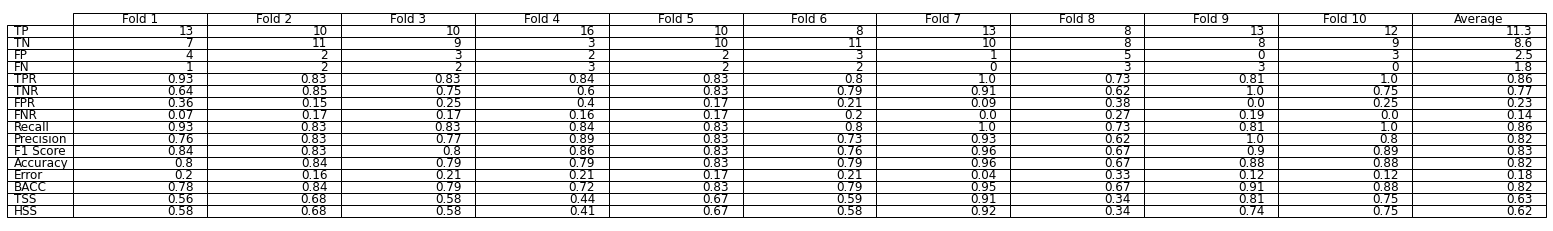

In [111]:
fig,ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

the_table=ax.table(cellText=data_rf, rowLabels=row, colLabels=column,loc='center',colWidths=[0.40 for x in column])
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
fig.tight_layout()
plt.show()
#plt.subplots_adjust(left=0.2,top=0.8)

In [112]:
from sklearn.model_selection import RepeatedKFold,cross_val_score
repeatedcv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
Scores_RKF = cross_val_score(clf,X_train,Y_train,scoring='accuracy',cv=repeatedcv,n_jobs=-1)
print('Accuracy: %.3f (%.3f)'%(np.mean(Scores_RKF),np.std(Scores_RKF)))

Accuracy: 0.817 (0.074)


In [113]:
feature_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
feature_imp = pd.Series(clf.feature_importances_,index=feature_names)


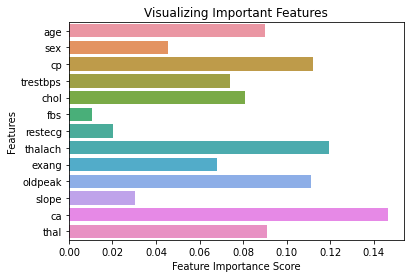

In [114]:
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf_svm = make_pipeline(StandardScaler(),SVC(kernel = 'sigmoid',gamma='auto',verbose=True))
clf_svm.fit(X_train,Y_train)

[LibSVM]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='sigmoid', verbose=True))])

In [116]:
y_pred_svm = clf_svm.predict(X_test)
print(y_pred_svm)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [117]:
tp(Y_test,y_pred_svm)
tn(Y_test,y_pred_svm)
fp(Y_test,y_pred_svm)
fn(Y_test,y_pred_svm)
tpr(Y_test,y_pred_svm)
tnr(Y_test,y_pred_svm)
fpr(Y_test,y_pred_svm)
fnr(Y_test,y_pred_svm)
Recall(Y_test,y_pred_svm)
Precision(Y_test,y_pred_svm)
F1Score(Y_test,y_pred_svm)
Accuracy(Y_test,y_pred_svm)
Error(Y_test,y_pred_svm)
BACC(Y_test,y_pred_svm)
TSS(Y_test,y_pred_svm)
HSS(Y_test,y_pred_svm)

0.66

In [118]:
cv = KFold(n_splits=10,random_state=1,shuffle=True)
scores_svm = cross_validate(clf_svm,X_train,Y_train,scoring = scoring,cv=cv)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [119]:
print(scores_svm)

{'fit_time': array([0.00652432, 0.00396609, 0.00396395, 0.00385213, 0.00386977,
       0.00459933, 0.00420237, 0.00386834, 0.00388408, 0.00408316]), 'score_time': array([0.02523541, 0.01843166, 0.0177803 , 0.0175972 , 0.02270675,
       0.01928544, 0.01698327, 0.01890016, 0.02555203, 0.01698923]), 'test_tp': array([13, 10, 11, 17, 10,  8, 13,  8, 11, 12]), 'test_tn': array([ 7,  7,  8,  4,  9, 12,  9,  8,  8,  8]), 'test_fp': array([4, 6, 4, 1, 3, 2, 2, 5, 0, 4]), 'test_fn': array([1, 2, 1, 2, 2, 2, 0, 3, 5, 0]), 'test_tpr': array([0.93, 0.83, 0.92, 0.89, 0.83, 0.8 , 1.  , 0.73, 0.69, 1.  ]), 'test_tnr': array([0.64, 0.54, 0.67, 0.8 , 0.75, 0.86, 0.82, 0.62, 1.  , 0.67]), 'test_fpr': array([0.36, 0.46, 0.33, 0.2 , 0.25, 0.14, 0.18, 0.38, 0.  , 0.33]), 'test_fnr': array([0.07, 0.17, 0.08, 0.11, 0.17, 0.2 , 0.  , 0.27, 0.31, 0.  ]), 'test_recall': array([0.93, 0.83, 0.92, 0.89, 0.83, 0.8 , 1.  , 0.73, 0.69, 1.  ]), 'test_precision': array([0.76, 0.62, 0.73, 0.94, 0.77, 0.8 , 0.87, 0.62, 

In [120]:
data_svm = [value for value in scores_svm.values()]
data_svm = data_svm[2:]

In [121]:
print(data_svm)

[array([13, 10, 11, 17, 10,  8, 13,  8, 11, 12]), array([ 7,  7,  8,  4,  9, 12,  9,  8,  8,  8]), array([4, 6, 4, 1, 3, 2, 2, 5, 0, 4]), array([1, 2, 1, 2, 2, 2, 0, 3, 5, 0]), array([0.93, 0.83, 0.92, 0.89, 0.83, 0.8 , 1.  , 0.73, 0.69, 1.  ]), array([0.64, 0.54, 0.67, 0.8 , 0.75, 0.86, 0.82, 0.62, 1.  , 0.67]), array([0.36, 0.46, 0.33, 0.2 , 0.25, 0.14, 0.18, 0.38, 0.  , 0.33]), array([0.07, 0.17, 0.08, 0.11, 0.17, 0.2 , 0.  , 0.27, 0.31, 0.  ]), array([0.93, 0.83, 0.92, 0.89, 0.83, 0.8 , 1.  , 0.73, 0.69, 1.  ]), array([0.76, 0.62, 0.73, 0.94, 0.77, 0.8 , 0.87, 0.62, 1.  , 0.75]), array([0.84, 0.71, 0.81, 0.92, 0.8 , 0.8 , 0.93, 0.67, 0.81, 0.86]), array([0.8 , 0.68, 0.79, 0.88, 0.79, 0.83, 0.92, 0.67, 0.79, 0.83]), array([0.2 , 0.32, 0.21, 0.12, 0.21, 0.17, 0.08, 0.33, 0.21, 0.17]), array([0.78, 0.69, 0.79, 0.85, 0.79, 0.83, 0.91, 0.67, 0.84, 0.83]), array([0.56, 0.37, 0.58, 0.69, 0.58, 0.66, 0.82, 0.34, 0.69, 0.67]), array([0.58, 0.37, 0.58, 0.65, 0.58, 0.66, 0.83, 0.34, 0.59, 0.6

In [122]:
for i in range(len(data_svm)):
    avg = round(sum(data_svm[i])/len(data_svm[i]),2)
    temp = list(data_svm[i])
    temp.append(avg)
    data_svm[i]=temp
print(data_svm)    
    

[[13, 10, 11, 17, 10, 8, 13, 8, 11, 12, 11.3], [7, 7, 8, 4, 9, 12, 9, 8, 8, 8, 8.0], [4, 6, 4, 1, 3, 2, 2, 5, 0, 4, 3.1], [1, 2, 1, 2, 2, 2, 0, 3, 5, 0, 1.8], [0.93, 0.83, 0.92, 0.89, 0.83, 0.8, 1.0, 0.73, 0.69, 1.0, 0.86], [0.64, 0.54, 0.67, 0.8, 0.75, 0.86, 0.82, 0.62, 1.0, 0.67, 0.74], [0.36, 0.46, 0.33, 0.2, 0.25, 0.14, 0.18, 0.38, 0.0, 0.33, 0.26], [0.07, 0.17, 0.08, 0.11, 0.17, 0.2, 0.0, 0.27, 0.31, 0.0, 0.14], [0.93, 0.83, 0.92, 0.89, 0.83, 0.8, 1.0, 0.73, 0.69, 1.0, 0.86], [0.76, 0.62, 0.73, 0.94, 0.77, 0.8, 0.87, 0.62, 1.0, 0.75, 0.79], [0.84, 0.71, 0.81, 0.92, 0.8, 0.8, 0.93, 0.67, 0.81, 0.86, 0.81], [0.8, 0.68, 0.79, 0.88, 0.79, 0.83, 0.92, 0.67, 0.79, 0.83, 0.8], [0.2, 0.32, 0.21, 0.12, 0.21, 0.17, 0.08, 0.33, 0.21, 0.17, 0.2], [0.78, 0.69, 0.79, 0.85, 0.79, 0.83, 0.91, 0.67, 0.84, 0.83, 0.8], [0.56, 0.37, 0.58, 0.69, 0.58, 0.66, 0.82, 0.34, 0.69, 0.67, 0.6], [0.58, 0.37, 0.58, 0.65, 0.58, 0.66, 0.83, 0.34, 0.59, 0.67, 0.58]]


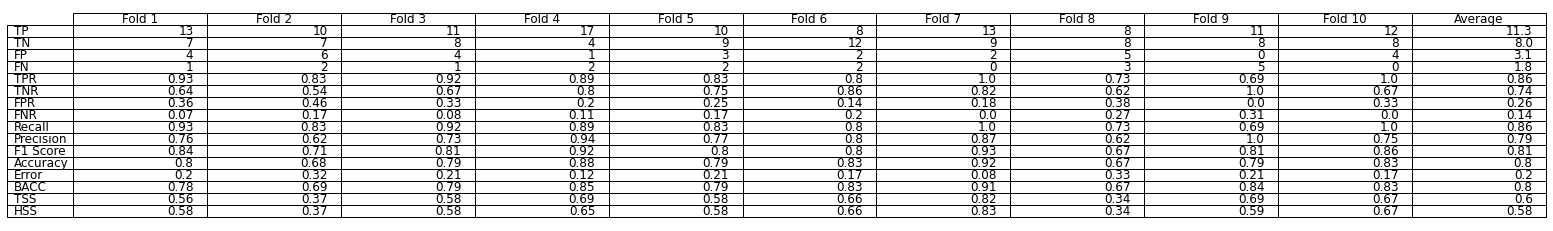

In [123]:
fig2,ax2 = plt.subplots()

# hide axes
fig2.patch.set_visible(False)
ax2.axis('off')
ax2.axis('tight')

the_table2=ax2.table(cellText=data_svm, rowLabels=row, colLabels=column,loc='center',colWidths=[0.40
                                                                                                for x in column])
the_table2.auto_set_font_size(False)
the_table2.set_fontsize(12)
fig2.tight_layout()
plt.show()

In [124]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=3)
clf_KNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [125]:
y_pred_knn = clf_KNN.predict(X_test)
print(y_pred_knn)

[0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0]


In [126]:
tp(Y_test,y_pred_knn)
tn(Y_test,y_pred_knn)
fp(Y_test,y_pred_knn)
fn(Y_test,y_pred_knn)
tpr(Y_test,y_pred_knn)
tnr(Y_test,y_pred_knn)
fpr(Y_test,y_pred_knn)
fnr(Y_test,y_pred_knn)
Recall(Y_test,y_pred_knn)
Precision(Y_test,y_pred_knn)
F1Score(Y_test,y_pred_knn)
Accuracy(Y_test,y_pred_knn)
Error(Y_test,y_pred_knn)
BACC(Y_test,y_pred_knn)
TSS(Y_test,y_pred_knn)
HSS(Y_test,y_pred_knn)

0.27

In [127]:
scores_knn = cross_validate(clf_KNN,X_train,Y_train,scoring = scoring,cv=cv)
print(scores_knn)

{'fit_time': array([0.00134802, 0.00073504, 0.00073028, 0.00071549, 0.00071383,
       0.00072837, 0.00072527, 0.00072455, 0.00072408, 0.00072384]), 'score_time': array([0.01864433, 0.01635432, 0.01617885, 0.01591825, 0.01604199,
       0.01789594, 0.0161159 , 0.01587582, 0.01618743, 0.01754045]), 'test_tp': array([10,  9,  8, 12,  5,  7,  9,  7,  9, 10]), 'test_tn': array([ 4,  7,  9,  1, 10,  8,  6,  5,  4,  6]), 'test_fp': array([7, 6, 3, 4, 2, 6, 5, 8, 4, 6]), 'test_fn': array([4, 3, 4, 7, 7, 3, 4, 4, 7, 2]), 'test_tpr': array([0.71, 0.75, 0.67, 0.63, 0.42, 0.7 , 0.69, 0.64, 0.56, 0.83]), 'test_tnr': array([0.36, 0.54, 0.75, 0.2 , 0.83, 0.57, 0.55, 0.38, 0.5 , 0.5 ]), 'test_fpr': array([0.64, 0.46, 0.25, 0.8 , 0.17, 0.43, 0.45, 0.62, 0.5 , 0.5 ]), 'test_fnr': array([0.29, 0.25, 0.33, 0.37, 0.58, 0.3 , 0.31, 0.36, 0.44, 0.17]), 'test_recall': array([0.71, 0.75, 0.67, 0.63, 0.42, 0.7 , 0.69, 0.64, 0.56, 0.83]), 'test_precision': array([0.59, 0.6 , 0.73, 0.75, 0.71, 0.54, 0.64, 0.47, 

In [128]:
data_knn = [value for value in scores_knn.values()]
data_knn = data_knn[2:]

In [129]:
for i in range(len(data_knn)):
    avg = round(sum(data_knn[i])/len(data_knn[i]),2)
    temp = list(data_knn[i])
    temp.append(avg)
    data_knn[i]=temp

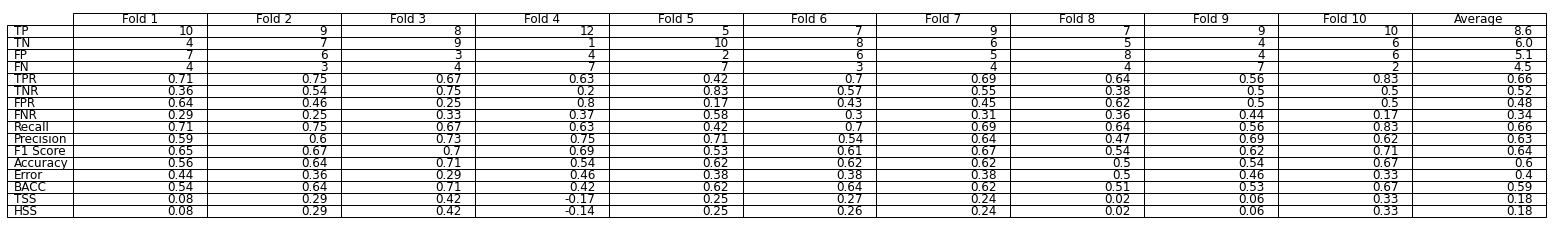

In [130]:
fig3,ax3 = plt.subplots()

# hide axes
fig3.patch.set_visible(False)
ax3.axis('off')
ax3.axis('tight')

the_table3=ax3.table(cellText=data_knn, rowLabels=row, colLabels=column,loc='center',colWidths=[0.40 for x in column])
the_table3.auto_set_font_size(False)
the_table3.set_fontsize(12)
fig3.tight_layout()
plt.show()

In [131]:
RF_ACC=scores['test_Accuracy']
avg_rf_acc = sum(RF_ACC)/len(RF_ACC)


In [132]:
SVM_ACC=scores_svm['test_Accuracy']
avg_svm_acc = sum(SVM_ACC)/len(SVM_ACC)

In [133]:
KNN_ACC=scores_knn['test_Accuracy']
avg_knn_acc= sum(KNN_ACC)/len(KNN_ACC)

Text(0.5, 1.1, 'Accuracy Comparision of three classifiers on Heart Disease dataset')

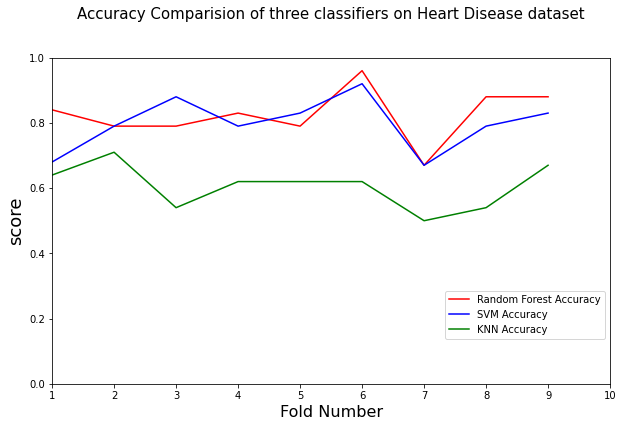

In [134]:
fig, ax = plt.subplots(figsize=(10, 6))
#sd=plt.subplot(211)
random_forest,=plt.plot(RF_ACC,color='r')
svm,=plt.plot(SVM_ACC,color='b')
knn,=plt.plot(KNN_ACC,color='g')
ax.set_xlim([1,10])
ax.set_ylim([0,1])
plt.ylabel("score", fontsize="18")
plt.xlabel("Fold Number",fontsize='16')
plt.legend([random_forest,svm,knn],
           ["Random Forest Accuracy", "SVM Accuracy","KNN Accuracy"],
           bbox_to_anchor=(0, .3, 1, 0))
plt.title("Accuracy Comparision of three classifiers on Heart Disease dataset",
          x=.5, y=1.1, fontsize="15")

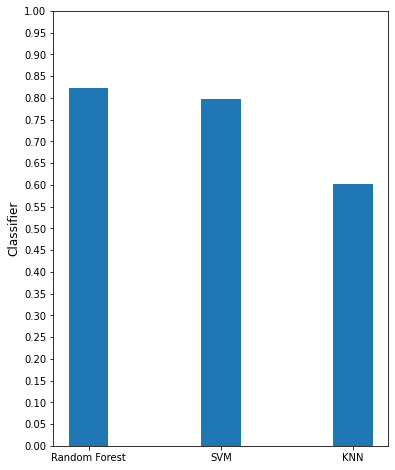

In [135]:
fig, ax = plt.subplots(figsize=(6, 8))
plt.bar(["Random Forest","SVM","KNN"],[avg_rf_acc,avg_svm_acc,avg_knn_acc],width=[0.3]) 
plt.ylabel("Average Accuracy Score",fontsize='12')
plt.ylabel("Classifier",fontsize='12')
plt.yticks(np.arange(0, 1.01,0.05))
plt.show()

In [136]:
def Choose_best_of_three(RF,Svm,Knn):
    
    best = max(RF,Svm,Knn)
    
    if best == RF:
        return "Random Forest is best among all classifiers with accuracy of %.3f"%RF
    elif best == Svm:
        return "SVM with kernel Sigmoid is best among all classifiers with accuracy of %.3f"%Svm
    else:
        return "Knn is best among all classifiers with accuracy of %.3f"%Knn
    

In [137]:
Choose_best_of_three(avg_rf_acc,avg_svm_acc,avg_knn_acc)

'Random Forest is best among all classifiers with accuracy of 0.823'